In [1]:
import Min_vertex_cover as mvc
import networkx as nx
import rustworkx as rx
import csv
import tensorflow as tf


import pennylane as qml
from pennylane.wires import Wires
from pennylane import numpy as np
from pennylane import qaoa


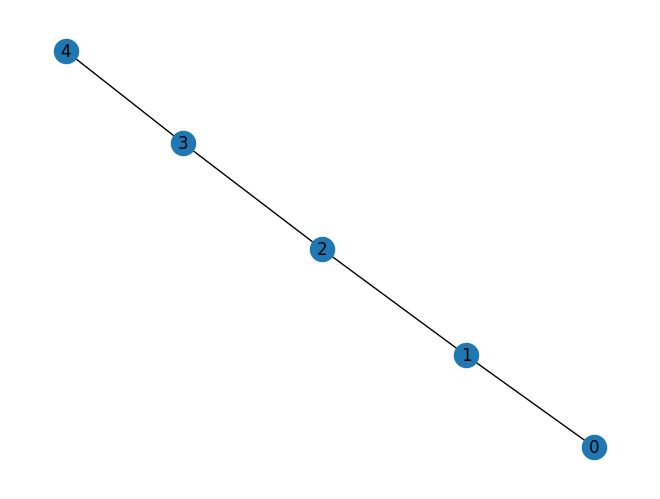

In [2]:
edges = [(0, 1), (1, 2),(2,3),(3,4)]
graph = nx.Graph(edges)
nx.draw(graph, with_labels=True)

In [3]:
def qaoa_layer(gamma, beta):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(beta, mixer_h)

wires = range(len(graph.nodes()))
depth = 1

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0],params[1])

dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)


def exp_values(cost_h,mixer_h):
    bet   = np.arange(0,2*np.pi,0.01)
    gam   = np.linspace(1,1,np.size(bet))
    res   = []
    for i in range(np.size(bet)):
        params = np.array([[gam[i]],[bet[i]]])
        res   += [cost_function(params)]
    return res

In [4]:
cost_h = mvc.cost_h(graph,1)

mixer_h_1 = mvc.bit_flip_mixer(graph,1)
mixer_h = mixer_h_1
exp_value_1 = exp_values(cost_h,mixer_h_1)





mixer_h_2 = mvc.bit_flip_mixer_2(graph,1)
mixer_h = mixer_h_2
exp_value_2 = exp_values(cost_h,mixer_h_2)


mixer_h_3 = mvc.bit_flip_mixer_3(graph,1)
mixer_h = mixer_h_3
exp_value_3 = exp_values(cost_h,mixer_h_3)

In [5]:
off_set = len(graph.nodes())/2
c = []
for a in exp_value_1:
    c += [a.numpy()]
c = np.array(c)
c = c/2+off_set

d = []
for b in exp_value_2:
    d +=[b.numpy()]
    
d = np.array(d)
d = d/2 +off_set

e = []
for b in exp_value_3:
    e +=[b.numpy()]
    
e = np.array(e)
e = e/2 + off_set



with open(f'Results/Path_{2*off_set}.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(["HMv", "Minimum", "mean"])
    writer.writerow([1, f"{np.min(c)}", f"{np.mean(c)}"])
    writer.writerow([2, f"{np.min(d)}", f"{np.mean(d)}"])
    writer.writerow([3, f"{np.min(e)}", f"{np.mean(e)}"])


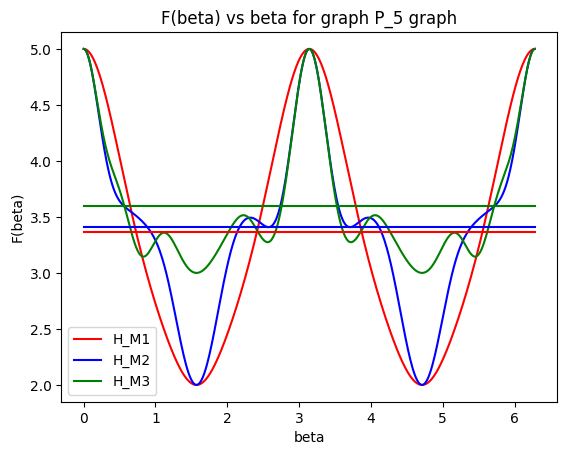

In [6]:
import matplotlib.pyplot as plt
bet   = np.arange(0,2*np.pi,0.01)
plt.plot(bet,c,'r',label = 'H_M1')
plt.plot(bet,d,'b',label = 'H_M2')
plt.plot(bet,e,'g',label = 'H_M3')
plt.plot(bet,np.linspace(np.mean(c),np.mean(c),np.size(bet)),'r')
plt.plot(bet,np.linspace(np.mean(d),np.mean(d),np.size(bet)),'b')
plt.plot(bet,np.linspace(np.mean(e),np.mean(e),np.size(bet)),'g')
plt.xlabel('beta')
plt.ylabel('F(beta)')
plt.title(f'F(beta) vs beta for graph P_{int(2*off_set)} graph')
plt.legend()
plt.savefig(f'Results/Path-{int(2*off_set)}.png')
plt.show()

In [8]:
qml.is_commuting(mixer_h_1,mixer_h_2-mixer_h_1)

KeyError: 'Hamiltonian'

In [10]:
H_1 = qml.PauliX(wires = 2) - qml.PauliX(wires=2)@qml.PauliZ(wires = 1) - qml.PauliX(wires =2 ) @qml.PauliZ(wires = 3) + qml.PauliX(wires =2 ) @qml.PauliZ(wires = 1) @qml.PauliZ(wires = 3)

In [11]:
H_1

  (1) [X2]
+ (-1) [X2 Z1]
+ (-1) [X2 Z3]
+ (1) [X2 Z1 Z3]


In [12]:
H_2 = qml.PauliX(wires = 1) @qml.PauliX(wires = 3) - qml.PauliX(wires = 1)@qml.PauliX(wires = 3) @qml.PauliZ(wires = 2) - qml.PauliX(wires = 1)@qml.PauliX(wires = 3) @qml.PauliZ(wires =0) + qml.PauliX(wires = 1)@qml.PauliX(wires = 3) @qml.PauliZ(wires = 0)@qml.PauliZ(wires = 2)

In [13]:
H_2

  (1) [X1 X3]
+ (-1) [X1 X3 Z2]
+ (-1) [X1 X3 Z0]
+ (1) [X1 X3 Z0 Z2]


In [15]:
qml.is_commuting(qml.PauliX(wires = 2) - qml.PauliX(wires=2)@qml.PauliZ(wires = 1) - qml.PauliX(wires =2 ) @qml.PauliZ(wires = 3) + qml.PauliX(wires =2 ) @qml.PauliZ(wires = 1) @qml.PauliZ(wires = 3),qml.PauliX(wires = 1) @qml.PauliX(wires = 3) - qml.PauliX(wires = 1)@qml.PauliX(wires = 3) @qml.PauliZ(wires = 2) - qml.PauliX(wires = 1)@qml.PauliX(wires = 3) @qml.PauliZ(wires =0) + qml.PauliX(wires = 1)@qml.PauliX(wires = 3) @qml.PauliZ(wires = 0)@qml.PauliZ(wires = 2))

KeyError: 'Hamiltonian'

In [20]:
Hmat1 = qml.Hamiltonian.sparse_matrix(H_1).real
mat1 = Hmat1.toarray()

In [22]:
Hmat2 = qml.Hamiltonian.sparse_matrix(H_2).real
mat2 = Hmat2.toarray()

In [24]:
mat1

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0.]])

In [25]:
mat2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [27]:
w = np.array([[0,0],[0,1]])
x = np.array([[0,1],[1,0]])
i = np.array([[1,0],[0,1]])

In [30]:
def t(a,b,c,d):
    return np.kron(a,np.kron(b,np.kron(c,d)))
h1 = t(x,w,i,w) + t(w,x,w,i)+t(i,w,x,w)+t(w,i,w,x)
h2 = t(x,w,x,w) + t(w,x,w,x)


In [31]:
np.matmul(h1,h2) == np.matmul(h2,h1)

tensor([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True, False,  True,  True, False,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          T